In [245]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

From course by Jose Portilla

In [246]:
# Define the model

class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):  #4 input features, hidden layer neurons and 3 classes output
        super().__init__()  # instantiate the module inherited from. Call own init method
        self.fc1 = nn.Linear(in_features,h1)    # fully connected input layer with number of features and number of neurons
        self.fc2 = nn.Linear(h1, h2)            # fully connected hidden layer connected to second hidden layer
        self.out = nn.Linear(h2, out_features)  # output layer with number of classes as output
        
    def forward(self, x):
        x = F.relu(self.fc1(x))  # define the activation functions on each layer - RELU, pass in connected layer
        x = F.relu(self.fc2(x))  
        x = self.out(x)          # output to return X
        return x

In [247]:
# Instantiate the Model class using parameter defaults:

torch.manual_seed(32)  # set random seed (weights and biases are set randomly)
model = Model()        # create instance of the model

In [248]:
df = pd.read_csv('C:/Users/imoge/Projects/Datasets/iris.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [249]:
df.shape

(150, 5)

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [251]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


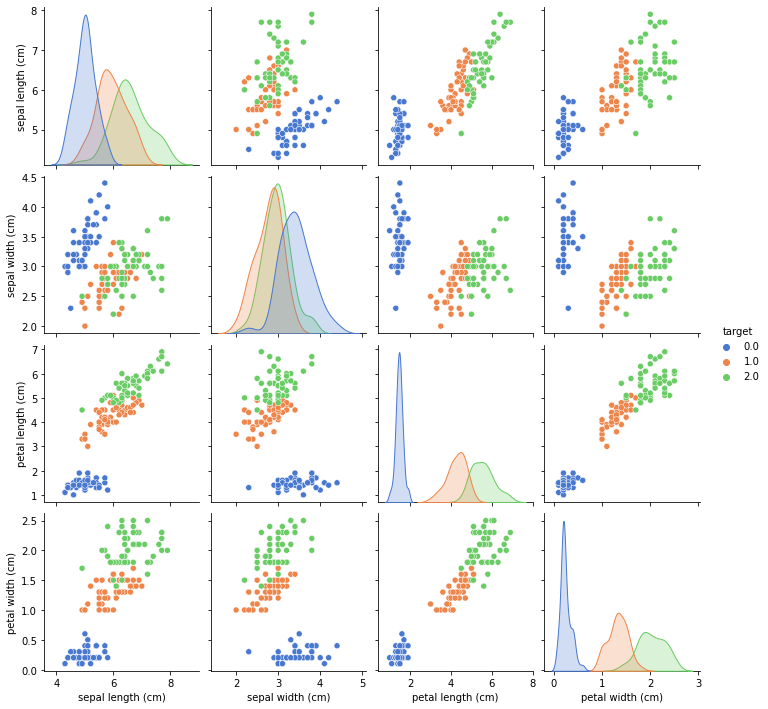

In [252]:
# Visualise the data
sns.pairplot(df,hue='target',palette="muted",vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)',],kind='scatter');

One category is clearly separable and distinct but the other two overlap a little.

In [253]:
# Split the dataset into X and y and then training and test sets

X = df.drop('target',axis=1).values # as numpy array
y = df['target'].values             # ditto

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=33) # 20% test set

In [254]:
# Convert to tensors as floats
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [255]:
# Set the y or target to a longtensor as an int64 value
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

Note:
Don't need to one-hot encode when using cross-entropy loss in pytorch but if necessary to one-hot encode then would use  F.one_hot:

* y_train = F.one_hot(torch.LongTensor(y_train))
* y_test = F.one_hot(torch.LongTensor(y_test))

In [256]:
# Use the pytorch dataloader to set batches to feed to the model
trainloader = DataLoader(X_train, batch_size=60, shuffle=True) # shuffle the training set
testloader = DataLoader(X_test, batch_size=60, shuffle=False) # shuffle not required for test set

In [257]:
# Set the random seed and create the model
torch.manual_seed(4)
model = Model()

In [258]:
# Define the loss function as criterion, the optimizer as Adam with learning rate specified and number of epochs
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [259]:
# Look at the model parameters
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [260]:
# To record the losses from the model

epochs = 100
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train) # call the forward method and pass in the training data
    loss = criterion(y_pred, y_train) # calculate the loss using cross-entropy against the predicted and actual training data
    losses.append(loss.item()) # append each loss value to the losses list (note .item extracts the value from the tensor)
   
    if i%10 == 1: # prints the loss at each ten epochs
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')
        
    optimizer.zero_grad() # find the gradient is zero using the optimizer
    loss.backward() # back-propagation process
    optimizer.step()

epoch:  1  loss: 1.09568226
epoch: 11  loss: 0.98190629
epoch: 21  loss: 0.75652379
epoch: 31  loss: 0.49447367
epoch: 41  loss: 0.34981725
epoch: 51  loss: 0.22807980
epoch: 61  loss: 0.13547555
epoch: 71  loss: 0.09162237
epoch: 81  loss: 0.07378435
epoch: 91  loss: 0.06546316


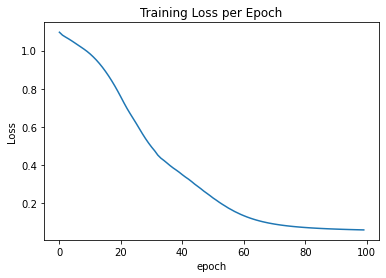

In [262]:
plt.plot(range(epochs), losses)
plt.title("Training Loss per Epoch")
plt.ylabel('Loss')
plt.xlabel('epoch');

In [263]:
# Performance on the test set
with torch.no_grad():   # deactivate backpropagation
    y_val = model.forward(X_test)   # push the test data through the network with trained weights and biases
    loss = criterion(y_val, y_test) # get the loss for the test data against the true target values
print(f'{loss:.8f}')

0.06247772


The loss value is similar to the training loss, so the model is not overfitting to the training data

In [268]:
# How many did we get correct?
correct = 0
with torch.no_grad():
    for i,data in enumerate(X_test):  
        y_val = model.forward(data)  # get y predictions using the X_test values
        print(f'{i+1}.) {str(y_val.argmax().item())} {y_test[i]}')
        if y_val.argmax().item() == y_test[i]: # compare the highest value to the y test values
            correct += 1
print(f'We got {correct} correct!')

1.) 1 1
2.) 1 1
3.) 0 0
4.) 1 1
5.) 2 2
6.) 2 2
7.) 0 0
8.) 0 0
9.) 2 2
10.) 2 2
11.) 2 2
12.) 0 0
13.) 2 2
14.) 1 1
15.) 2 2
16.) 1 1
17.) 1 2
18.) 0 0
19.) 1 1
20.) 2 2
21.) 0 0
22.) 0 0
23.) 2 2
24.) 0 0
25.) 2 2
26.) 2 2
27.) 1 1
28.) 1 1
29.) 2 2
30.) 2 2
We got 29 correct!


In [269]:
# Save the model to file
torch.save(model.state_dict(), 'C:/Users/imoge/Projects/IrisDatasetModel.pt')

In [270]:
# Reload model with weights and biases
new_model = Model()
new_model.load_state_dict(torch.load('C:/Users/imoge/Projects/IrisDatasetModel.pt'))
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

NOTE

Save as a pickle file (pass in model not the load_state_dict) if you need to save the whole model, as the load_state assumes you still have the model class available

In [271]:
# Predict on the test features and you get the same loss
with torch.no_grad():
    y_val = new_model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

0.06247772


In [274]:
# Predict on a new item
new_data = torch.tensor([5.6,3.7,2.2,0.5])

In [277]:
# Run the new datapoint through the model
labels = ['Iris setosa','Iris virginica','Iris versicolor','New Flower']
with torch.no_grad():
    print(new_model(new_data))
    print()
    print(labels[new_model(new_data).argmax()])

tensor([ 12.2112,   7.1279, -19.5248])

Iris setosa
